##Introduction
This notebook demonstrates how to use the pyRDDLGym package to simulate and visualize an Reinforcement Learning (RL) environment. In this notebook, we will set up the environment and an agent, and then run an agent-environment loop to perform a task in the environment. Specifically, we will be using the example environment "HVAC" provided by pyRDDLGym, and a random agent to perform an action in the environment.

Reference: https://ataitler.github.io/IPPC2023/infrastructure.html

⚠️ **Note:** This Colab notebook has been created based on my current understanding of RDDL, which I have recently learned. **While I have made every effort to ensure the accuracy and quality, there may be areas where my understanding is limited.** I welcome feedback and suggestions. Thank you for your understanding!

##Cloning the repository named "pyRDDLGym" from the GitHub 

In [1]:
!git clone https://github.com/ataitler/pyRDDLGym.git

Cloning into 'pyRDDLGym'...
remote: Enumerating objects: 9329, done.
remote: Counting objects: 100% (2423/2423), done.
remote: Compressing objects: 100% (755/755), done.
remote: Total 9329 (delta 1757), reused 2311 (delta 1663), pack-reused 6906
Receiving objects: 100% (9329/9329), 7.35 MiB | 9.29 MiB/s, done.
Resolving deltas: 100% (6216/6216), done.


##Initializing environment in pyRDDLGym

In [2]:
#Changing the working directory to the "pyRDDLGym" directory
%cd /content/pyRDDLGym

/content/pyRDDLGym


In [3]:
#Installing all the required packages listed in the "requirements.txt" file
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


##Installing dependencies to run virtual display

In [4]:
!apt-get install -y xserver-xephyr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxcb-xv0 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxcb-xv0 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common xserver-xephyr
0 upgraded, 10 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,843 kB of archives.
After this operation, 12.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb-xv0 amd64 1.14-2 [9,192 B]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:5

In [5]:
!apt install -y xvfb python-opengl 
!pip install gym pyvirtualdisplay 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libpython2-stdlib python2 python2-minimal
Suggested packages:
  python-tk python-numpy libgle3 python2-doc
The following NEW packages will be installed:
  freeglut3 libpython2-stdlib python-opengl python2 python2-minimal xvfb
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,401 kB of archives.
After this operation, 8,330 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libpython2-stdlib amd64 2.7.17-2ubuntu4 [7,072 B]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2 amd64 2.7.17-2ubuntu4 [26.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:5 http://archive.ubuntu.com/u

In [6]:
#Setting up a virtual display using PyVirtualDisplay and IPython
from pyvirtualdisplay import Display
from IPython import display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [8]:
#Importing necessary modules from the pyRDDLGym package

from pyRDDLGym import RDDLEnv
from pyRDDLGym import ExampleManager


/content/pyRDDLGym/pyRDDLGym/Examples/ExampleManager.py:90: DeprecationWarning: invalid escape sequence \d
  x = re.search("instance\d+.*", file)


In [9]:
ENV = "HVAC"        #ENV-->string name of the desired example environment
EnvInfo = ExampleManager.GetEnvInfo(ENV)

/content/pyRDDLGym/pyRDDLGym/Examples /content/pyRDDLGym/pyRDDLGym/Examples/manifest.csv
Available example environment(s):
NewLanguage -> Example with new language features.
NewtonZero -> Example with Newton root-finding method.
SupplyChainNet -> A supply chain network with factory and multiple warehouses.
PropDBN -> Simple propositional DBN.
Reservoir discrete -> Discrete version of management of the water level in interconnected reservoirs.
Reservoir continuous -> Continuous action version of management of the water level in interconnected reservoirs.
MountainCar -> A simple continuous MDP for the classical mountain car control problem.
Elevators -> The Elevator domain models evening rush hours when people from different floors in a building want to go down to the bottom floor using elevators.
RaceCar -> A simple continuous MDP for the racecar problem.
SupplyChain -> A supply chain with factory and multiple warehouses.
CartPole discrete -> A simple continuous state MDP for the classi

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


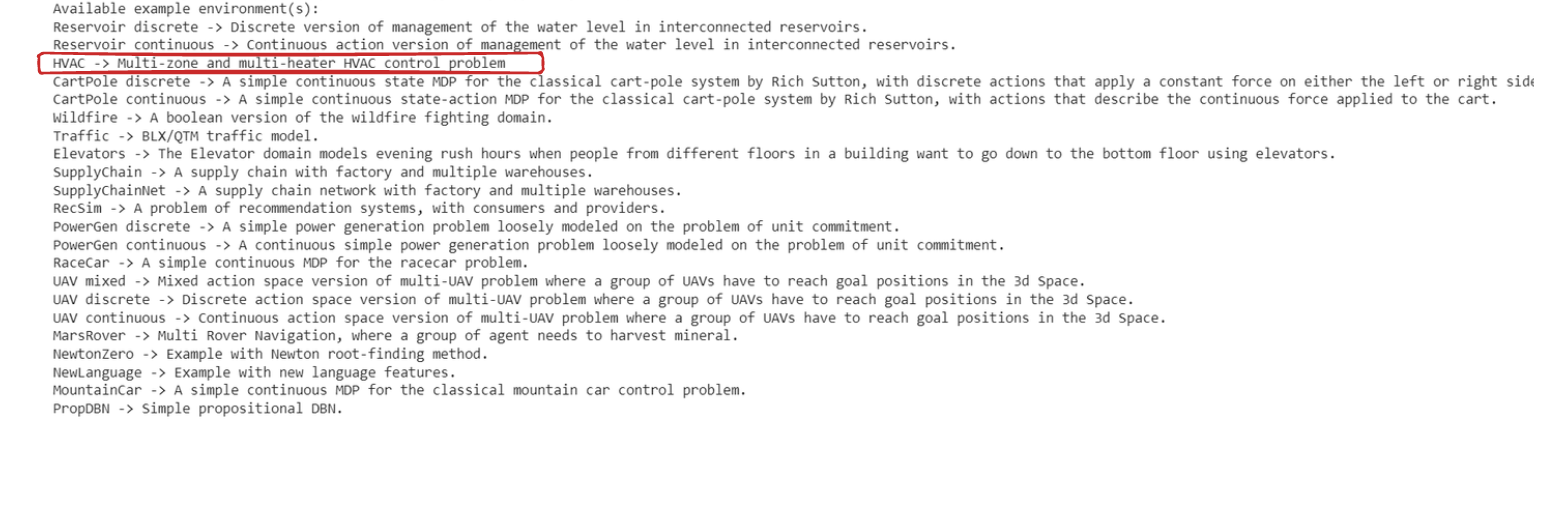

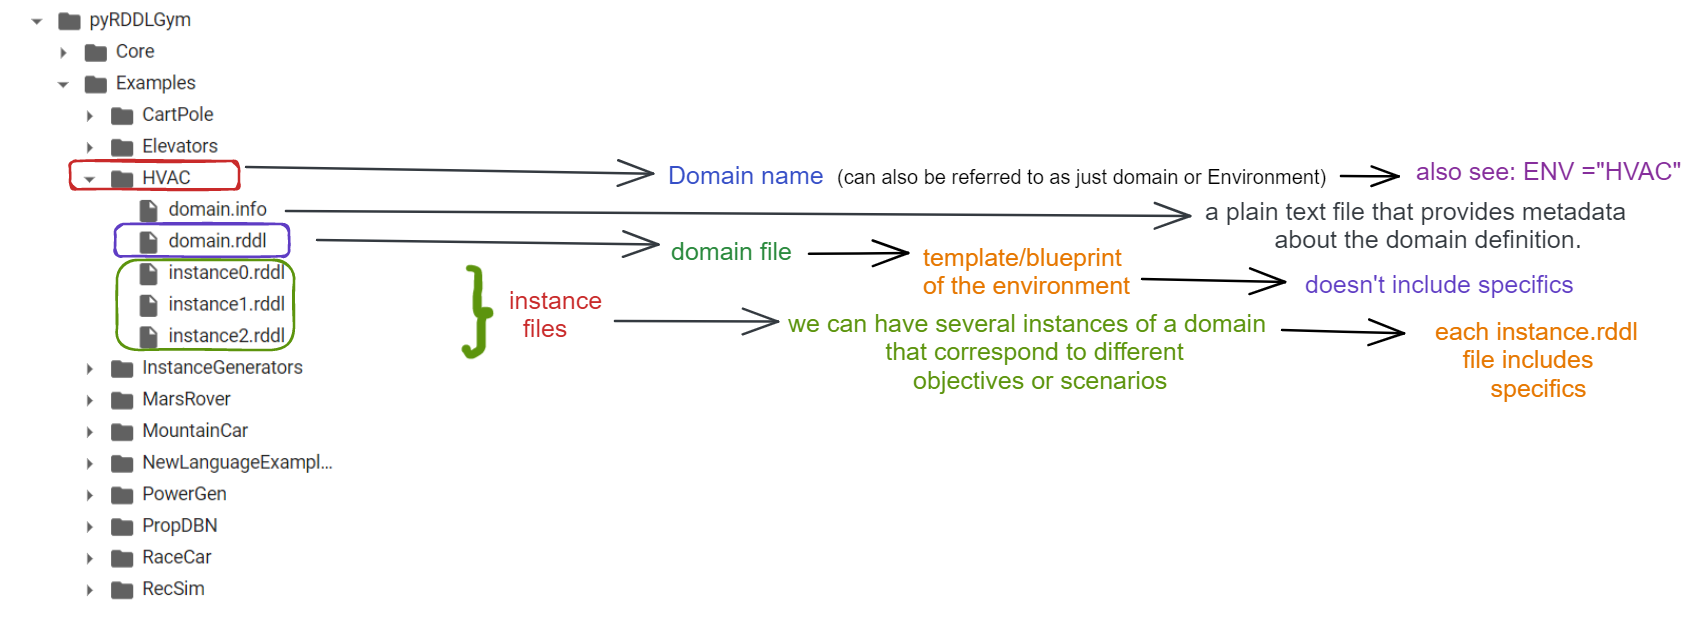

In [10]:
#Creating Environment
myEnv = RDDLEnv.RDDLEnv(domain=EnvInfo.get_domain(), instance=EnvInfo.get_instance(0))

Generating LALR tables


Note: The instance.rddl file describes the specific instance of the environment with its initial state and objects, while the domain.rddl file describes the general structure of the environment, including the state variables, actions, and rewards.

In [11]:
#Action Space
print(f"Action Space: {myEnv.action_space}")

Action Space: Dict('fan-in___z1': Box(0.05, inf, (1,), float32), 'heat-input___h1': Box(-inf, inf, (1,), float32))


In [12]:
#Observation Space
print(f"Observation Space: {myEnv.observation_space}")

Observation Space: Dict('temp-zone___z1': Box(-inf, inf, (1,), float32), 'temp-heater___h1': Box(-inf, inf, (1,), float32), 'occupied___z1': Discrete(2))


In [13]:
#Listing all the available instances of the problem
EnvInfo.list_instances()

['instance1.rddl', 'instance2.rddl', 'instance0.rddl']

In [14]:
# set up the environment visualizer
myEnv.set_visualizer(EnvInfo.get_visualizer())

#Interacting with the Environment

pyRDDLGym is build on Gym as so implements the classic “agent-environment loop”. The infrastructure comes with two simple agents:

1. NoOpAgent - which allows the environment to evolve according to the default behavior as specified in the RDDL file.
2. RandomAgent - which sends a rendom action according to the env.action_space and the maximum number of allowed concurrent actions as specified in the RDDL file.

In [15]:
from pyRDDLGym.Policies.Agents import RandomAgent


In [16]:
# set up an aget
agent = RandomAgent(action_space=myEnv.action_space, num_actions=myEnv.numConcurrentActions)

This line of code sets up a RandomAgent that takes actions in the environment. The action_space argument is the space of all possible actions the agent can take, while num_actions is the number of concurrent actions the agent can take at once.

In [21]:
print(f"Maximum number of time steps that the agent will take in the environment before the episode is terminated: {myEnv.horizon}")

Maximum number of time steps that the agent will take in the environment before the episode is terminated: 120


###Agent-Environment Interaction Loop

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

total_reward = 0
state = myEnv.reset()
img = plt.imshow(myEnv.render('rgb_array'))

#Agent-Environment Loop
for _ in range(myEnv.horizon):
      myEnv.render()
      next_state, reward, done, info = myEnv.step(agent.sample_action())
      total_reward += reward
      state = next_state

      img.set_data(myEnv.render('rgb_array')) # just update the data
      plt.axis('off')
      plt.show()
      
      if done:
            break
            
myEnv.close()

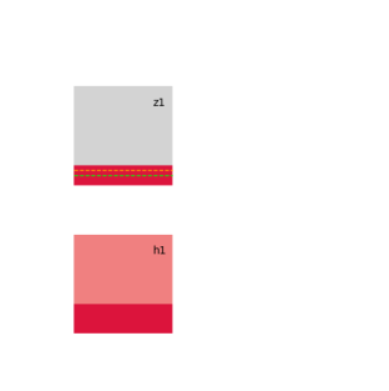

Note:
1. If encountering the error message **"display Surface quit"**, the solution would be to **restart the Runtime** and re-run the cells.

2. In this example, we only ran the loop for a fixed number of time steps (specified by the horizon parameter in the environment), but in practice, RL algorithms often run for much longer, often millions of time steps or more.

⚠️**Advisory:** This Colab notebook has been created based on my current understanding of RDDL, which I have recently learned. While I have made every effort to ensure the accuracy and quality of the content, there may be areas where my understanding is limited. I welcome feedback and suggestions. Thank you for your understanding!

##Some Potential Objectives that can be Used in Planning and Scheduling HVAC Systems using RDDL


1. **Minimizing energy consumption:** The objective can be to minimize the energy consumption of the HVAC system, while still maintaining a comfortable indoor environment.

2. **Maximizing indoor comfort:** The objective can be to maximize the comfort level of the occupants of the building by maintaining a specific temperature, humidity, and air quality.

3. **Minimizing equipment maintenance costs:** The objective can be to minimize the costs associated with maintenance and repair of the HVAC system by optimizing the use of equipment and minimizing downtime.

4. **Minimizing peak demand:** The objective can be to reduce the peak demand on the HVAC system during periods of high usage, in order to avoid overload and reduce energy costs.

5. **Maximizing system reliability:** The objective can be to maximize the reliability of the HVAC system by preventing equipment failures and reducing the need for repairs.

6. **Maximizing indoor air quality:** The objective can be to maximize the air quality in the indoor environment by reducing the levels of pollutants and maintaining appropriate ventilation.

7. **Minimizing HVAC noise:** The objective can be to minimize the noise generated by the HVAC system in order to improve the comfort level of the occupants.

8. **Minimizing carbon emissions:** The objective can be to minimize the carbon emissions associated with the operation of the HVAC system, in order to reduce the environmental impact.

9. **Minimizing HVAC footprint:** The objective can be to minimize the physical footprint of the HVAC system in order to reduce the amount of space required for installation.

10. **Maximizing occupant satisfaction:** The objective can be to maximize the satisfaction level of the occupants by providing a comfortable indoor environment that meets their needs and preferences.